<div class="usecase-title"> Smart Urban Mobility Analysis</div>

<div class="usecase-authors"><b>Authored by: </b> Chathu Siriwardena</div>

<div class="usecase-duration"><b>Duration:</b> {90} mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>{Intermediate}</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b> Python, Data Wrangling, Data Visualisation, Data Modeling, Machine Learning, Deep Learning, Geographical Coordinates Handling</div>
</div>

<div class="usecase-section-header">Scenario</div>
<br>This use case focuses on integrating pedestrian traffic, public transport accessibility, tree canopy coverage, and weather conditions to improve urban mobility, promote sustainable commuting, and enhance city planning. By leveraging data-driven insights, the City of Melbourne can design walkable, climate-resilient, and commuter-friendly urban spaces.

User Story

* As a commuter, I want to find shaded and pedestrian-friendly routes so that I can walk comfortably, even during extreme weather.

* As a public transport user, I want to know how weather impacts bus and tram services so that I can plan my commute efficiently.

* As a city planner, I want to identify heat-prone pedestrian areas so that we can prioritise tree planting and optimize transport connectivity.

* As a business owner, I want to understand foot traffic patterns near my store so that I can adjust my operations based on customer movement trends.

At the end of this use case you will:
* Learn to import data sets using API v2.1
* Gain proficiency in merging multiple datasets to create a comprehensive view.
* Learn data visualisation using matplotlib and seaborn
* Understand geospatial analysis by working with geolocations using libraries like Geopy and Folium to map pedestrian routes, transport networks, and   tree canopy coverage.
* Develop a "Cool Routes" scoring model that combines tree canopy data, pedestrian counts, and weather conditions to identify optimal walking paths for heat resilience.
* Learn how to calculate distances between business locations and nearby transport options, identifying areas with limited access to public transport and offering recommendations for urban mobility planning.
* Develop regression models and basic Feed-Forward Neural Networks (FFNN) to predict foot traffic demand based on weather conditions, optimising public transport schedules for sustainable and efficient commuting.
* Evaluate the impact of the Green Commute on pedestrian satisfaction and heat stress reduction


Data Sets Used:

Data Set 1. [Pedestrian Counting System](https://data.melbourne.vic.gov.au/explore/dataset/pedestrian-counting-system-monthly-counts-per-hour)<br> This data set contains ID,Location ID, Base Sensing Date, Hour Day, Direction 1, Direction 2, Pedestrain Count, Sensor Name and Location. The data set was used to identify the movements of pedestrains around city area. The dataset is imported from Melbourne Open Data website, using API V2.


Data Set 2. [Tree Canopies Data](https://data.melbourne.vic.gov.au/explore/dataset/tree-canopies-public-realm-2018-urban-forest)<br> This data set contains geo_point_2d, geo_shape, objectid, shape_leng, shape_area. The datahset contains tree canopy within City of Melbourne mapped using 2018 aerial photos and LiDARd city area. The dataset is imported from Melbourne Open Data website, u.sing API V2

Data Set 3. [Bus Stop Data](https://data.melbourne.vic.gov.au/explore/dataset/bus-stops)<br> This data set contains geo_point_2d, geo_shape, objectid, addresspt1, addressp_1, asset_clas, asset_type, objectid, str_id,  addresspt, asset_subt,  model_desc, mcc_id, roadseg_id, description, model_no. This data set shows the locations of the bus stops within the city of Melbourne. The dataset is imported from Melbourne Open Data website, using API V2.

Data Set 4.[City Circle Tram Stops Data](https://data.melbourne.vic.gov.au/explore/dataset/city-circle-tram-stops)<br> This data set contains geo_point_2d, geo_shape,  name, xorg, stop_no, mccid_str, xsource, xdate, mccid_int. The data set contains the city circle tram service data within Melbourne city. The dataset is imported from Melbourne Open Data website, using API V2.

Data Set 5.[Microclimate Sensors Data](https://data.melbourne.vic.gov.au/explore/dataset/microclimate-sensors-data)<br> This data set contains device_id, received_at, sensorlocation, latlong, minimumwinddirection, averagewinddirection, maximumwinddirection, minimumwindspeed, averagewindspeed, gustwindspeed, airtemperature, relativehumidity, atmosphericpressure, pm25, pm10, noise. The data set contains This dataset contains climate readings from climate sensors located within the City. The dataset is imported from Melbourne Open Data website, using API V2.

Outline of the Use Case

1. Data Preprocessing
   
     I started use case by cleaning and preparing each dataset for analysis. This involves handling missing values and duplicates: Remove or impute          missing values in latitude, longitude, and other critical fields.

2. Data Visualisation

##### Importing Required Libraries

The below code imports a range of libraries essential for data analysis, visualisation, mapping, and interactivity. requests is used to fetch data from APIs, while pandas and numpy support data manipulation and numerical operations. StringIO helps handle in-memory text data, such as loading CSVs from strings. For geolocation tasks, geopy and its Nominatim geocoder are used to convert place names into coordinates. folium enables the creation of interactive maps, and ipywidgets along with IPython.display allows for interactive elements within a Jupyter Notebook. Visualisation is handled by seaborn and matplotlib.pyplot, with Patch from matplotlib.patches used for custom legends or shapes in plots, and the datetime module is included for working with date and time data, which is often crucial in temporal analysis.

In [55]:
import requests
import pandas as pd
import numpy as np
from io import StringIO
import geopy
from geopy.geocoders import Nominatim
import folium
from ipywidgets import interact, widgets
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from matplotlib.patches import Patch 

##### Loading all Data sets


<div class="Data_Set">Data Set 1: Pedestrian Counting System.</div>

In [10]:
base_url='https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
dataset_id='pedestrian-counting-system-monthly-counts-per-hour'

url=f'{base_url}{dataset_id}/exports/csv'
params={'select':'*','limit':-1,'lang':'en','timezone':'UTC'}

response=requests.get(url,params=params)

if response.status_code==200:
    url_content=response.content.decode('utf-8')
    pedestrian_df=pd.read_csv(StringIO(url_content),delimiter=';')
    print(pedestrian_df.head(10))
else:
    print(f'Request failed with status code {response.status_code}')

             id  location_id sensing_date  hourday  direction_1  direction_2  \
0  371420221110           37   2022-11-10       14           77           90   
1  521220230401           52   2023-04-01       12          335          321   
2  841620220330           84   2022-03-30       16          581         1030   
3  541520230928           54   2023-09-28       15          166          166   
4  611220220103           61   2022-01-03       12           99          185   
5  391720221028           39   2022-10-28       17          136          115   
6  611520250302           61   2025-03-02       15          622          921   
7  111120210926           11   2021-09-26       11          186           97   
8  461820230508           46   2023-05-08       18          190           85   
9   70520250129           70   2025-01-29        5            1            2   

   pedestriancount sensor_name                    location  
0              167    Lyg260_T  -37.80107122, 144.96704554

Data Set 2: Tree Canopies Data.

In [18]:
base_url='https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
dataset_id='tree-canopies-public-realm-2018-urban-forest'


url=f'{base_url}{dataset_id}/exports/csv'
params={'select':'*','limit':-1,'lang':'en','timezone':'UTC'}

response=requests.get(url,params=params)

if response.status_code==200:
    url_content=response.content.decode('utf-8')
    tree_canopies_df=pd.read_csv(StringIO(url_content),delimiter=';')
    print(tree_canopies_df.head(10))
else:
    print(f'Request failed with status code {response.status_code}')

                              geo_point_2d  \
0   -37.81304517121492, 144.98612858745977   
1  -37.813031352270215, 144.98264073647684   
2   -37.81261020314892, 144.96112288812233   
3   -37.81219284514014, 144.93846977801448   
4   -37.81239953857732, 144.95122560445583   
5  -37.813040580695024, 144.98654806873841   
6    -37.81231922742188, 144.9447777601162   
7   -37.81218994603368, 144.94262980622725   
8   -37.81245033141797, 144.98815520131134   
9    -37.81244314561024, 144.9495590639178   

                                           geo_shape  objectid  shape_leng  \
0  {"coordinates": [[[[144.98613240697972, -37.81...     10373    2.692370   
1  {"coordinates": [[[[144.98267255431483, -37.81...     10379   55.155123   
2  {"coordinates": [[[[144.96112403835852, -37.81...     10380    6.279844   
3  {"coordinates": [[[[144.93847665550007, -37.81...     10399    7.048844   
4  {"coordinates": [[[[144.95122528646937, -37.81...     10400    2.794252   
5  {"coordinates": [[[[14

Data Set 3: Bus Stops Data.

In [33]:
base_url='https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
dataset_id='bus-stops'


url=f'{base_url}{dataset_id}/exports/csv'
params={'select':'*','limit':-1,'lang':'en','timezone':'UTC'}

response=requests.get(url,params=params)

if response.status_code==200:
    url_content=response.content.decode('utf-8')
    bus_stops_df=pd.read_csv(StringIO(url_content),delimiter=';')
    print(bus_stops_df.head(10))
else:
    print(f'Request failed with status code {response.status_code}')

                              geo_point_2d  \
0   -37.81842481335676, 144.96889648633675   
1   -37.81767597164006, 144.95888238475013   
2   -37.78188915501449, 144.95963193312105   
3  -37.793726533289785, 144.94716743007305   
4   -37.80286165064241, 144.92778487963457   
5  -37.825617941052066, 144.96024538933693   
6   -37.82825403073943, 144.97139535783998   
7    -37.81810589679171, 144.9619763819388   
8   -37.847587034180215, 144.9797183050512   
9   -37.82375108048519, 144.96722832469055   

                                           geo_shape  prop_id  addresspt1  \
0  {"coordinates": [144.96889648633675, -37.81842...   573333   29.149053   
1  {"coordinates": [144.95888238475013, -37.81767...        0   10.537902   
2  {"coordinates": [144.95963193312105, -37.78188...        0   25.269643   
3  {"coordinates": [144.94716743007305, -37.79372...        0   44.230506   
4  {"coordinates": [144.92778487963457, -37.80286...        0   67.718553   
5  {"coordinates": [144.9602453

Data Set 4: City Circle Tram Stops Data.

In [40]:
base_url='https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
dataset_id='city-circle-tram-stops'


url=f'{base_url}{dataset_id}/exports/csv'
params={'select':'*','limit':-1,'lang':'en','timezone':'UTC'}

response=requests.get(url,params=params)

if response.status_code==200:
    url_content=response.content.decode('utf-8')
    tram_stops_df=pd.read_csv(StringIO(url_content),delimiter=';')
    print(tram_stops_df.head(10))
else:
    print(f'Request failed with status code {response.status_code}')

                              geo_point_2d  \
0   -37.82023778673241, 144.95786314283018   
1   -37.82097269970027, 144.95546153614245   
2   -37.82190465062153, 144.95109855638137   
3  -37.811771476718356, 144.95644059700524   
4   -37.81105928060848, 144.95891745116262   
5   -37.80961884837298, 144.96384957029932   
6  -37.808876998255194, 144.96634474519394   
7   -37.81358116790275, 144.97406360491075   
8    -37.8176316450406, 144.96690455927876   
9    -37.818324403770184, 144.964479208357   

                                           geo_shape  \
0  {"coordinates": [144.95786314283018, -37.82023...   
1  {"coordinates": [144.95546153614245, -37.82097...   
2  {"coordinates": [144.95109855638137, -37.82190...   
3  {"coordinates": [144.95644059700524, -37.81177...   
4  {"coordinates": [144.95891745116262, -37.81105...   
5  {"coordinates": [144.96384957029932, -37.80961...   
6  {"coordinates": [144.96634474519394, -37.80887...   
7  {"coordinates": [144.97406360491075, -37.8

Data Set 5: Micro Climate Data.

In [46]:
base_url='https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
dataset_id='microclimate-sensors-data'


url=f'{base_url}{dataset_id}/exports/csv'
params={'select':'*','limit':-1,'lang':'en','timezone':'UTC'}

response=requests.get(url,params=params)

if response.status_code==200:
    url_content=response.content.decode('utf-8')
    climate_df=pd.read_csv(StringIO(url_content),delimiter=';')
    print(climate_df.head(10))
else:
    print(f'Request failed with status code {response.status_code}')

            device_id                received_at  \
0  ICTMicroclimate-04  2024-10-27T04:03:25+00:00   
1  ICTMicroclimate-01  2024-10-27T04:05:07+00:00   
2  ICTMicroclimate-08  2024-10-20T03:57:20+00:00   
3  ICTMicroclimate-07  2024-10-20T03:53:20+00:00   
4  ICTMicroclimate-02  2024-10-20T03:59:35+00:00   
5  ICTMicroclimate-09  2024-10-20T04:05:20+00:00   
6  ICTMicroclimate-07  2024-10-20T04:08:23+00:00   
7  ICTMicroclimate-06  2024-10-20T04:06:38+00:00   
8  ICTMicroclimate-04  2024-10-15T15:11:36+00:00   
9           aws5-0999  2024-08-16T19:18:57+00:00   

                                      sensorlocation  \
0                                        Batman Park   
1                    Birrarung Marr Park - Pole 1131   
2  Swanston St - Tram Stop 13 adjacent Federation...   
3  Tram Stop 7C - Melbourne Tennis Centre Precinc...   
4                         101 Collins St L11 Rooftop   
5  SkyFarm (Jeff's Shed). Rooftop - Melbourne Con...   
6  Tram Stop 7C - Melbourne Tennis 

#### Pedestrian Counting System Data.

I performed different data cleaning methods. <br>

* Droped 'id', 'location_id', 'direction-1','direction-2' , 'location'and 'sensor_name' columns and renamed 'Sensing_date' as 'Date'.
* Created 'latitude' and 'longitude' columns from 'location' column

In [14]:
pedestrian_df.head(10)

,id,location_id,sensing_date,hourday,direction_1,direction_2,pedestriancount,sensor_name,location
0,109720240812,109,2024-08-12,7,43,256,299,LatWill_T,"-37.81193681, 144.95621105"
1,762220240829,76,2024-08-29,22,2,3,5,KenMac_T,"-37.79453803, 144.93036194"
2,711820240308,71,2024-03-08,18,16,18,34,WestWP_T,"-37.81235775, 144.97136962"
3,40620221018,40,2022-10-18,6,23,57,80,Spr201_T,"-37.80999341, 144.97227587"
4,8020230524,8,2023-05-24,0,1,3,4,WebBN_T,"-37.82293543, 144.9471751"
5,121320231211,12,2023-12-11,13,108,80,188,NewQ_T,"-37.81457988, 144.94292398"
6,441020230919,44,2023-09-19,10,51,23,74,UM3_T,"-37.79698741, 144.96441306"
7,45320231026,45,2023-10-26,3,5,9,14,Swa148_T,"-37.81414075, 144.96609379"
8,1351120240407,135,2024-04-07,11,419,396,815,Spen161_T,"-37.8172861, 144.95319102"
9,108920240218,108,2024-02-18,9,108,114,222,261Will_T,"-37.81295822, 144.95678789"


The above output shows the first 10 rows of the pedestrian sensor dataset. Each row represents hourly pedestrian counts recorded by a specific sensor at a particular location and time and provides an initial view of the structure and granularity of the dataset, confirming that it contains both spatial and temporal information, which is essential for further analysis and visualisation.

In [20]:
pedestrian_df.shape

(2259125, 9)

There are 2,259,125 records and 9 variables (or features) with each row representing a unique observation of pedestrian counts at a specific time and location.

In [21]:
pedestrian_df.nunique()

id                 2259125
location_id             97
sensing_date          1371
hourday                 24
direction_1           3160
direction_2           3245
pedestriancount       5028
sensor_name             95
location                97
dtype: int64

In [11]:
# Split 'location' into 'latitude' and 'longitude'
pedestrian_df[['latitude', 'longitude']] = pedestrian_df['location'].str.split(', ', expand=True)

# Drop 'id', 'location_id', 'direction-1','direction-2' , 'location'and 'sensor_name' columns
pedestrian_df = pedestrian_df.drop(columns=['id', 'location_id', 'direction_1','direction_2', 'sensor_name', 'location'])

# Rename 'Sensing_date' to 'Date'
pedestrian_df = pedestrian_df.rename(columns={'sensing_date': 'Date'})

pedestrian_df.head(10)

,Date,hourday,pedestriancount,latitude,longitude
0,2022-11-10,14,167,-37.80107122,144.96704554
1,2023-04-01,12,656,-37.81252157,144.9619401
2,2022-03-30,16,1611,-37.81798049,144.96503383
3,2023-09-28,15,332,-37.804024,144.96308399
4,2022-01-03,12,284,-37.80767455,144.96309114
5,2022-10-28,17,251,-37.81379749,144.96995745
6,2025-03-02,15,1543,-37.80767455,144.96309114
7,2021-09-26,11,283,-37.81564989,144.93970694
8,2023-05-08,18,275,-37.80240719,144.9615673
9,2025-01-29,5,3,-37.80456984,144.94946228


The location column contains both latitude and longitude as a single string. Hence that string splits into two separate columns—latitude and longitude—which makes it easier to work with coordinates for mapping or spatial analysis. Other steps clean and streamline the dataset by removing redundant information, improving clarity, and preparing it for visualisation, filtering, or analysis focused on time and location-based pedestrian patterns.

#### Tree Canopies Data.

I performed different data cleaning methods. <br>

* Droped 'geo_shape', 'geo_point_2d' and 'objectid' columns.
* Created 'latitude' and 'longitude' columns from 'geo_point_2d' column

In [19]:
tree_canopies_df.head(10)

,geo_point_2d,geo_shape,objectid,shape_leng,shape_area
0,"-37.81304517121492, 144.98612858745977","{""coordinates"": [[[[144.98613240697972, -37.81...",10373,2.692370,0.488406
1,"-37.813031352270215, 144.98264073647684","{""coordinates"": [[[[144.98267255431483, -37.81...",10379,55.155123,125.461002
2,"-37.81261020314892, 144.96112288812233","{""coordinates"": [[[[144.96112403835852, -37.81...",10380,6.279844,2.816221
3,"-37.81219284514014, 144.93846977801448","{""coordinates"": [[[[144.93847665550007, -37.81...",10399,7.048844,3.643475
4,"-37.81239953857732, 144.95122560445583","{""coordinates"": [[[[144.95122528646937, -37.81...",10400,2.794252,0.612298
5,"-37.813040580695024, 144.98654806873841","{""coordinates"": [[[[144.98655398642268, -37.81...",10385,4.334477,1.348686
6,"-37.81231922742188, 144.9447777601162","{""coordinates"": [[[[144.94478614151308, -37.81...",10387,8.128402,4.911725
7,"-37.81218994603368, 144.94262980622725","{""coordinates"": [[[[144.9426325334389, -37.812...",10438,7.923251,4.257095
8,"-37.81245033141797, 144.98815520131134","{""coordinates"": [[[[144.98817843816417, -37.81...",10669,10.680974,4.845412
9,"-37.81244314561024, 144.9495590639178","{""coordinates"": [[[[144.94963279484296, -37.81...",10393,60.743893,165.844186


The above table displays the first 10 entries of the tree canopy dataset, which provides spatial data on tree canopy coverage in Melbourne. Each row corresponds to a specific tree canopy polygon. This dataset is essential for spatial analysis and visualisation of tree cover in relation to other urban features like pedestrian movement, public transport access, or heat mapping.

In [13]:
tree_canopies_df.shape

(32787, 5)

There are 32,787 individual tree canopy records, each representing a unique canopy area in the city and the dataset includes five attributes per record.

In [15]:
tree_canopies_df.nunique()

geo_point_2d    32787
geo_shape       32785
objectid        32787
shape_leng      32737
shape_area      32740
dtype: int64

In [20]:
# Split 'geo_point_2d' into 'latitude' and 'longitude'
tree_canopies_df[['latitude', 'longitude']] = tree_canopies_df['geo_point_2d'].str.split(', ', expand=True)

# Drop 'geo_shape', 'geo_point_2d' and 'objectid' columns
tree_canopies_df = tree_canopies_df.drop(columns=['geo_shape', 'objectid', 'geo_point_2d'])

tree_canopies_df.head(10)

,shape_leng,shape_area,latitude,longitude
0,2.692370,0.488406,-37.81304517121492,144.98612858745977
1,55.155123,125.461002,-37.813031352270215,144.98264073647684
2,6.279844,2.816221,-37.81261020314892,144.96112288812233
3,7.048844,3.643475,-37.81219284514014,144.93846977801448
4,2.794252,0.612298,-37.81239953857732,144.95122560445583
5,4.334477,1.348686,-37.813040580695024,144.98654806873841
6,8.128402,4.911725,-37.81231922742188,144.9447777601162
7,7.923251,4.257095,-37.81218994603368,144.94262980622725
8,10.680974,4.845412,-37.81245033141797,144.98815520131134
9,60.743893,165.844186,-37.81244314561024,144.9495590639178


The geo_point_2d column contains location data as a single string ("latitude, longitude").This line splits it into two separate columns: latitude and longitude, which is more convenient for mapping and spatial joins. 

These columns are removed to clean the dataset:

geo_shape contains complex geometry that's not needed for basic mapping or analysis.

objectid is just a unique identifier, not required for the use case.

geo_point_2d is now redundant since latitude and longitude are split out.

Above steps streamline the dataset by focusing on the essential information: canopy area, shape length, and geographic coordinates. This makes the data easier to work with for visualisation and spatial analysis.

#### Bus Stops Data.

I performed different data cleaning methods.

* Droped 'geo_shape', 'prop_id', 'geo_point_2d' , 'addresspt1', addressp_1 'asset_clas', 'asset_type', 'objectid','str_id','addresspt','asset_subt','model_desc','mcc_id' ,'roadseg_id', 'descriptio', and 'model_no' columns
* Created 'latitude' and 'longitude' columns from 'geo_point_2d' column.
* Added Stop Type columnn
* Removed Duplicates

In [23]:
bus_stops_df.head(10)

,geo_point_2d,geo_shape,prop_id,addresspt1,addressp_1,asset_clas,asset_type,objectid,str_id,addresspt,asset_subt,model_desc,mcc_id,roadseg_id,descriptio,model_no
0,"-37.81842481335676, 144.96889648633675","{""coordinates"": [144.96889648633675, -37.81842...",573333,29.149053,288,Signage,Sign - Public Transport,749,1249454,606816,NaN,Sign - Public Transport 1 Panel,1249454,0,Sign - Public Transport 1 Panel Bus Stop Type 12,P.16
1,"-37.81767597164006, 144.95888238475013","{""coordinates"": [144.95888238475013, -37.81767...",0,10.537902,105,Signage,Sign - Public Transport,2098,1247042,507646,NaN,Sign - Public Transport 1 Panel,1247042,20118,Sign - Public Transport 1 Panel Bus Stop Type 8,P.16
2,"-37.78188915501449, 144.95963193312105","{""coordinates"": [144.95963193312105, -37.78188...",0,25.269643,212,Signage,Sign - Public Transport,2143,1252383,108510,NaN,Sign - Public Transport 1 Panel,1252383,22387,Sign - Public Transport 1 Panel Bus Stop Type 8,P.16
3,"-37.793726533289785, 144.94716743007305","{""coordinates"": [144.94716743007305, -37.79372...",0,44.230506,237,Signage,Sign - Public Transport,2627,1249788,100087,NaN,Sign - Public Transport 1 Panel,1249788,20919,Sign - Public Transport 1 Panel Bus Stop Type 8,P.16
4,"-37.80286165064241, 144.92778487963457","{""coordinates"": [144.92778487963457, -37.80286...",0,67.718553,360,Signage,Sign - Public Transport,3306,1235311,103002,NaN,Sign - Public Transport 1 Panel,1235311,21680,Sign - Public Transport 1 Panel Bus Stop Type 13,P.16
5,"-37.825617941052066, 144.96024538933693","{""coordinates"": [144.96024538933693, -37.82561...",0,27.977750,81,Signage,Sign - Public Transport,3416,1239919,108053,NaN,Sign - Public Transport 1 Panel,1239919,22042,Sign - Public Transport 1 Panel Bus Stop Type 3,P.16
6,"-37.82825403073943, 144.97139535783998","{""coordinates"": [144.97139535783998, -37.82825...",0,0.000000,0,Signage,Sign - Public Transport,4934,1239032,0,NaN,Sign - Public Transport 1 Panel,1239032,22704,Sign - Public Transport 1 Panel Bus Stop Type 8,P.16
7,"-37.81810589679171, 144.9619763819388","{""coordinates"": [144.9619763819388, -37.818105...",0,42.393818,331,Signage,Sign - Public Transport,5041,1245405,527935,NaN,Sign - Public Transport 1 Panel,1245405,20170,Sign - Public Transport 1 Panel Bus Stop Type 3,P.16
8,"-37.847587034180215, 144.9797183050512","{""coordinates"": [144.9797183050512, -37.847587...",0,49.228469,73,Signage,Sign - Public Transport,5193,1255275,632373,NaN,Sign - Public Transport 1 Panel,1255275,22477,Sign - Public Transport 1 Panel Bus Stop Type 8,P.16
9,"-37.82375108048519, 144.96722832469055","{""coordinates"": [144.96722832469055, -37.82375...",0,24.455021,231,Signage,Sign - Public Transport,5935,1239562,567779,NaN,Sign - Public Transport 1 Panel,1239562,22121,Sign - Public Transport 1 Panel Bus Stop Type 8,P.16


Above table shows the first 10 rows of the bus stops dataset, which includes geographic and descriptive details about public transport signage (bus stops) in the area. Each row represents one bus stop sign.

In [24]:
bus_stops_df.shape

(309, 16)

The bus_stops_df dataset contains 309 rows and 16 columns, representing detailed information for 309 individual bus stop assets.

In [25]:
bus_stops_df.nunique()

geo_point_2d    295
geo_shape       295
prop_id           6
addresspt1      274
addressp_1      193
asset_clas        1
asset_type        1
objectid        309
str_id          309
addresspt       241
asset_subt        0
model_desc        1
mcc_id          309
roadseg_id      198
descriptio        8
model_no          1
dtype: int64

In [34]:
# Split 'geo_point_2d' into 'latitude' and 'longitude'
bus_stops_df[['latitude', 'longitude']] = bus_stops_df['geo_point_2d'].str.split(', ', expand=True)

# Drop 'geo_shape', 'prop_id', 'geo_point_2d' , 'addresspt1', addressp_1 'asset_clas', 'asset_type', 'objectid', 'str_id','addresspt','asset_subt','model_desc','mcc_id' ,'roadseg_id', 'descriptio', and 'model_no' columns
bus_stops_df = bus_stops_df.drop(columns=['geo_shape', 'geo_point_2d','prop_id', 'addresspt1', 'addressp_1', 'asset_clas', 'asset_type', 'objectid', 'str_id','addresspt','asset_subt','model_desc','mcc_id' ,'roadseg_id', 'descriptio', 'model_no' ])

#Added Stop Type column
bus_stops_df['stop_type'] = 'Bus Stop'

#Remove duplicates
bus_stops_df = bus_stops_df.drop_duplicates(subset=['latitude', 'longitude'])

bus_stops_df.head(10)

,latitude,longitude,stop_type
0,-37.81842481335676,144.96889648633675,Bus Stop
1,-37.81767597164006,144.95888238475013,Bus Stop
2,-37.78188915501449,144.95963193312105,Bus Stop
3,-37.793726533289785,144.94716743007305,Bus Stop
4,-37.80286165064241,144.92778487963457,Bus Stop
5,-37.825617941052066,144.96024538933693,Bus Stop
6,-37.82825403073943,144.97139535783998,Bus Stop
7,-37.81810589679171,144.9619763819388,Bus Stop
8,-37.847587034180215,144.9797183050512,Bus Stop
9,-37.82375108048519,144.96722832469055,Bus Stop


I splitted the geo_point_2d column into two separate columns: latitude and longitude, making it easier to work with geographic data, and removed columns that are either irrelevant or redundant for the analysis, keeping only the necessary data (like latitude, longitude, and stop_type). A new column, stop_type, is added and set to 'Bus Stop' for all rows, specifying the type of asset. Removed any duplicate bus stops that may have the same coordinates, ensuring each bus stop is unique based on its location.

In [37]:
bus_stops_df.shape

(295, 3)

In [38]:
bus_stops_df.nunique()

latitude     295
longitude    295
stop_type      1
dtype: int64

#### Tram Stops Data.

I performed different data cleaning methods.

* Droped 'geo_shape', 'geo_point_2d','xorg', 'stop_no', 'mccid_str', 'xsource', 'axdate', and 'mccid_int' columns.
* Created 'latitude' and 'longitude' columns from 'geo_point_2d' column.
* Added Stop Type columnn.

In [18]:
tram_stops_df.head(10)

,geo_point_2d,geo_shape,name,xorg,stop_no,mccid_str,xsource,xdate,mccid_int
0,"-37.82023778673241, 144.95786314283018","{""coordinates"": [144.95786314283018, -37.82023...",Melbourne Aquarium / Flinders Street,GIS Team,2,NaN,Mapbase,2011-10-18,4
1,"-37.82097269970027, 144.95546153614245","{""coordinates"": [144.95546153614245, -37.82097...",Spencer Street / Flinders Street,GIS Team,1,NaN,Mapbase,2011-10-18,5
2,"-37.82190465062153, 144.95109855638137","{""coordinates"": [144.95109855638137, -37.82190...",The Goods Shed / Wurundjeri Way,GIS Team,D5,NaN,Mapbase,2011-10-18,7
3,"-37.811771476718356, 144.95644059700524","{""coordinates"": [144.95644059700524, -37.81177...",William Street / La Trobe Street,GIS Team,3,NaN,Mapbase,2011-10-18,16
4,"-37.81105928060848, 144.95891745116262","{""coordinates"": [144.95891745116262, -37.81105...",Queen Street / La Trobe Street,GIS Team,4,NaN,Mapbase,2011-10-18,17
5,"-37.80961884837298, 144.96384957029932","{""coordinates"": [144.96384957029932, -37.80961...",Swanston Street / La Trobe Street,GIS Team,6,NaN,Mapbase,2011-10-18,19
6,"-37.808876998255194, 144.96634474519394","{""coordinates"": [144.96634474519394, -37.80887...",Russell Street / La Trobe Street,GIS Team,7,NaN,Mapbase,2011-10-18,20
7,"-37.81358116790275, 144.97406360491075","{""coordinates"": [144.97406360491075, -37.81358...",Parliament / Collins Street,GIS Team,8,NaN,Mapbase,2011-10-18,25
8,"-37.8176316450406, 144.96690455927876","{""coordinates"": [144.96690455927876, -37.81763...",Swanston Street / Flinders Street,GIS Team,5,NaN,Mapbase,2011-10-18,1
9,"-37.818324403770184, 144.964479208357","{""coordinates"": [144.964479208357, -37.8183244...",Elizabeth Street / Flinders Street,GIS Team,4,NaN,Mapbase,2011-10-18,2


The tram_stops_df dataset includes information about tram stop locations in Melbourne. It contains columns like geo_point_2d, which represents the latitude and longitude of each stop, and geo_shape, which holds the geospatial shape data in JSON format. Other columns, such as name, provide the tram stop’s description, while stop_no represents its unique identifier. The dataset also includes metadata like the data source (xsource), collection date (xdate), and identifiers in both string and integer formats (mccid_str and mccid_int). This data can be used for analyzing tram stop locations and other related insights.

In [41]:
tram_stops_df.shape

(28, 9)

The shape of the tram_stops_df dataset is (28, 9), it has 128 rows and 9 columns.

In [42]:
tram_stops_df.nunique()

geo_point_2d    28
geo_shape       28
name            28
xorg             1
stop_no         18
mccid_str        0
xsource          1
xdate            1
mccid_int       28
dtype: int64

In [44]:
# Split 'geo_point_2d' into 'latitude' and 'longitude'
tram_stops_df[['latitude', 'longitude']] = tram_stops_df['geo_point_2d'].str.split(', ', expand=True)

# Drop 'geo_shape', 'geo_point_2d','xorg', 'stop_no', 'mccid_str', 'xsource', 'axdate', and'mccid_int' columns
tram_stops_df = tram_stops_df.drop(columns=['geo_shape', 'geo_point_2d','xorg', 'stop_no', 'mccid_str', 'xsource', 'xdate', 'mccid_int' ])

#Added Stop Type column
tram_stops_df['stop_type'] = 'Tram Stop'

tram_stops_df.head(10)

,name,latitude,longitude,stop_type
0,Melbourne Aquarium / Flinders Street,-37.82023778673241,144.95786314283018,Tram Stop
1,Spencer Street / Flinders Street,-37.82097269970027,144.95546153614245,Tram Stop
2,The Goods Shed / Wurundjeri Way,-37.82190465062153,144.95109855638137,Tram Stop
3,William Street / La Trobe Street,-37.811771476718356,144.95644059700524,Tram Stop
4,Queen Street / La Trobe Street,-37.81105928060848,144.95891745116262,Tram Stop
5,Swanston Street / La Trobe Street,-37.80961884837298,144.96384957029932,Tram Stop
6,Russell Street / La Trobe Street,-37.808876998255194,144.96634474519394,Tram Stop
7,Parliament / Collins Street,-37.81358116790275,144.97406360491075,Tram Stop
8,Swanston Street / Flinders Street,-37.8176316450406,144.96690455927876,Tram Stop
9,Elizabeth Street / Flinders Street,-37.818324403770184,144.964479208357,Tram Stop


The below actions performed to clean the data set

Splitting geo_point_2d into latitude and longitude: This extracts the latitude and longitude values from the geo_point_2d column, which is in the format of a string like "-37.82023778673241, 144.95786314283018", and assigns them to new columns latitude and longitude.

Dropping unnecessary columns: Columns like geo_shape, geo_point_2d, xorg, stop_no, mccid_str, xsource, xdate, and mccid_int are dropped as they are no longer needed for analysis, leaving only relevant data.

Adding a stop_type column: A new column called stop_type is added to the dataset, with the value 'Tram Stop' for all rows, indicating that these are tram stop locations.



#### Climate Data.

I performed different data cleaning methods.

* Droped 'device_id', 'received_at','sensorlocation', and 'latlong' columns.
* Created 'latitude' and 'longitude' columns from 'latlong' column.
* Filled Null values.

In [19]:
climate_df.head(10)

,device_id,received_at,sensorlocation,latlong,minimumwinddirection,averagewinddirection,maximumwinddirection,minimumwindspeed,averagewindspeed,gustwindspeed,airtemperature,relativehumidity,atmosphericpressure,pm25,pm10,noise
0,ICTMicroclimate-08,2025-02-09T00:54:37+00:00,Swanston St - Tram Stop 13 adjacent Federation...,"-37.8184515, 144.9678474",0.0,153.0,358.0,0.0,3.9,7.9,23.9,57.300000,1009.7,0.0,0.0,80.500000
1,ICTMicroclimate-11,2025-02-09T01:02:11+00:00,1 Treasury Place,"-37.812888, 144.9750857",0.0,144.0,356.0,0.0,2.0,7.8,24.5,56.200000,1005.3,0.0,0.0,62.900000
2,ICTMicroclimate-05,2025-02-09T01:03:24+00:00,Enterprize Park - Pole ID: COM1667,"-37.8204083, 144.9591192",0.0,45.0,133.0,0.0,1.5,2.7,25.0,60.000000,1009.6,1.0,3.0,68.500000
3,ICTMicroclimate-01,2025-02-09T01:02:43+00:00,Birrarung Marr Park - Pole 1131,"-37.8185931, 144.9716404",NaN,150.0,NaN,NaN,1.6,NaN,23.1,61.099998,1009.0,0.0,5.0,51.700001
4,ICTMicroclimate-09,2025-02-09T01:17:37+00:00,SkyFarm (Jeff's Shed). Rooftop - Melbourne Con...,"-37.8223306, 144.9521696",0.0,241.0,359.0,0.0,0.9,4.4,25.6,53.700000,1007.9,0.0,0.0,60.200000
5,ICTMicroclimate-05,2025-02-09T01:18:26+00:00,Enterprize Park - Pole ID: COM1667,"-37.8204083, 144.9591192",0.0,357.0,32.0,1.6,1.9,2.2,24.5,58.700000,1009.3,1.0,3.0,68.700000
6,ICTMicroclimate-02,2025-02-09T01:26:51+00:00,101 Collins St L11 Rooftop,"-37.814604, 144.9702991",0.0,357.0,359.0,0.0,0.5,1.4,26.6,51.800000,1004.7,1.0,3.0,69.200000
7,ICTMicroclimate-07,2025-02-09T01:35:39+00:00,Tram Stop 7C - Melbourne Tennis Centre Precinc...,"-37.8222341, 144.9829409",0.0,91.0,356.0,0.0,0.9,4.4,26.6,49.200000,1011.3,0.0,0.0,64.500000
8,ICTMicroclimate-01,2025-02-09T01:32:44+00:00,Birrarung Marr Park - Pole 1131,"-37.8185931, 144.9716404",NaN,143.0,NaN,NaN,1.9,NaN,23.9,59.599998,1008.5,0.0,5.0,53.200001
9,ICTMicroclimate-04,2025-02-09T01:38:22+00:00,Batman Park,"-37.8221828, 144.9562225",0.0,10.0,356.0,0.0,1.5,6.9,26.5,51.800000,1011.9,0.0,0.0,72.300000


The climate_df dataframe contains data from environmental sensors located in different parts of Melbourne, tracking various climate variables. This dataset will be used to analyze environmental conditions in different areas over time.

In [47]:
climate_df.shape

(294602, 16)

The climate_df dataframe has a shape of (294602, 16), meaning it contains 294,602 rows and 16 columns. This indicates that there are 294,602 individual climate measurements across the 16 features recorded by the sensors.

In [48]:
climate_df.nunique()

device_id                   12
received_at             292141
sensorlocation              11
latlong                     12
minimumwinddirection       360
averagewinddirection       360
maximumwinddirection       361
minimumwindspeed           408
averagewindspeed           102
gustwindspeed              268
airtemperature             543
relativehumidity          1551
atmosphericpressure       1644
pm25                       526
pm10                       116
noise                     1115
dtype: int64

In [52]:

# Change 'received_at' is in datetime format
climate_df['received_at'] = pd.to_datetime(climate_df['received_at'])

# Create separate columns for date and time
climate_df['date'] = climate_df['received_at'].dt.date
climate_df['time'] = climate_df['received_at'].dt.time

#Filling Null value
climate_df.fillna(0, inplace=True)

# Split 'latlong' into 'latitude' and 'longitude'
climate_df[['latitude', 'longitude']] = climate_df['latlong'].str.split(', ', expand=True)

# Drop 'device_id', 'received_at','sensorlocation', and 'latlong' columns
climate_df = climate_df.drop(columns=['device_id', 'received_at','sensorlocation', 'latlong'])


# Print the results
climate_df.head(10)

,minimumwinddirection,averagewinddirection,maximumwinddirection,minimumwindspeed,averagewindspeed,gustwindspeed,airtemperature,relativehumidity,atmosphericpressure,pm25,pm10,noise,date,time,latitude,longitude
0,0.0,1.0,355.0,0.0,1.2,4.4,25.500000,32.000000,1015.300000,1.0,1.0,72.2,2024-10-27,04:03:25,-37.8221828,144.9562225
1,0.0,357.0,0.0,0.0,0.3,0.0,26.299999,25.799999,1011.799988,0.0,5.0,55.0,2024-10-27,04:05:07,-37.8185931,144.9716404
2,0.0,163.0,350.0,0.0,2.4,7.3,17.500000,66.900000,1022.500000,2.0,2.0,95.8,2024-10-20,03:57:20,-37.8184515,144.9678474
3,0.0,208.0,358.0,0.0,0.9,4.9,19.100000,62.300000,1024.500000,3.0,3.0,82.3,2024-10-20,03:53:20,-37.8222341,144.9829409
4,3.0,291.0,358.0,0.4,1.7,3.6,17.400000,74.400000,1018.000000,2.0,4.0,77.6,2024-10-20,03:59:35,-37.814604,144.9702991
5,0.0,203.0,358.0,0.0,2.0,6.8,17.000000,68.600000,1021.500000,1.0,4.0,62.0,2024-10-20,04:05:20,-37.8223306,144.9521696
6,0.0,330.0,356.0,0.0,0.7,4.8,18.800000,63.500000,1024.700000,3.0,3.0,62.4,2024-10-20,04:08:23,-37.8222341,144.9829409
7,0.0,240.0,357.0,0.0,1.4,7.2,17.600000,67.000000,1022.900000,1.0,2.0,59.0,2024-10-20,04:06:38,-37.8194993,144.9787211
8,0.0,0.0,314.0,0.0,0.4,1.0,17.600000,68.500000,1018.900000,6.0,7.0,56.4,2024-10-15,15:11:36,-37.8221828,144.9562225
9,0.0,0.0,179.0,0.0,0.0,0.8,9.500000,96.100000,1001.400000,0.0,0.0,0.0,2024-08-16,19:18:57,-37.7956167,144.9519007


The received_at column was converted to a datetime format and splits it into separate date and time columns, and filled  any missing values with 0, then splits the latlong column into latitude and longitude. Unnecessary columns like device_id, received_at, sensorlocation, and latlong were dropped to simplify the dataframe. The result is a clean dataframe with the required information for analysis.

#### Data Visualisation - Pedestrian Counting System Data.


<b>Plotting the Time Series of Pedestrian Count
 </b>

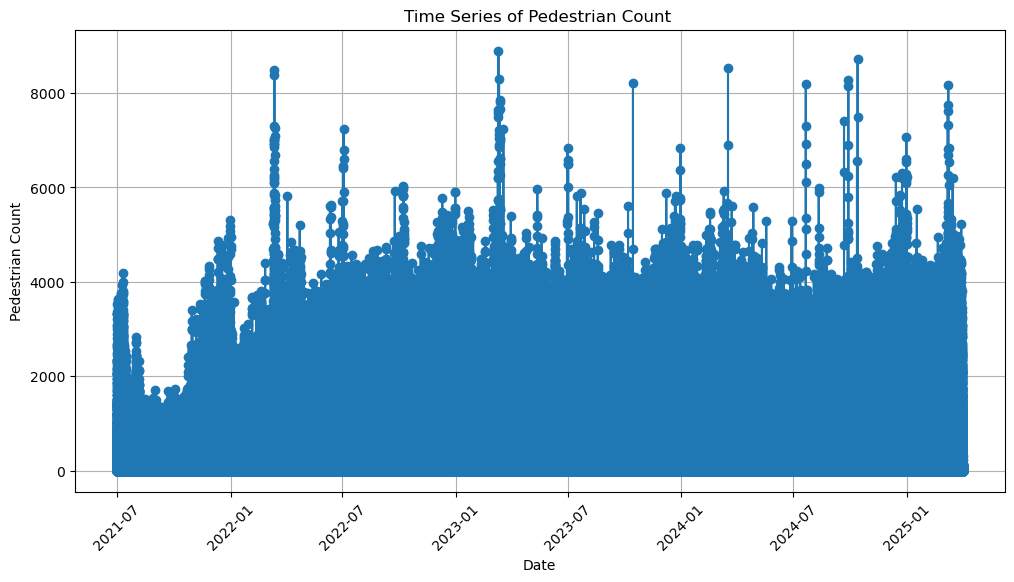

In [36]:

pedestrian_df["sensing_date"] = pd.to_datetime(pedestrian_df["sensing_date"])

# Plot
plt.figure(figsize=(12, 6))
plt.plot(pedestrian_df["sensing_date"], pedestrian_df["pedestriancount"], marker='o', linestyle='-')

plt.xlabel("Date")
plt.ylabel("Pedestrian Count")
plt.title("Time Series of Pedestrian Count ")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

According to above Time series plot 

* There seems to be an overall increasing trend, suggesting that pedestrian activity has generally risen over time.

* Some periodic fluctuations may indicate seasonal effects such as weekends, holidays, or special events.

* Some days show extreme spikes in pedestrian traffic.

* These could correspond to events, festivals, or special occasions that caused a surge in foot traffic.

<b>Plotting Monthly Pedestrian Count
 </b>

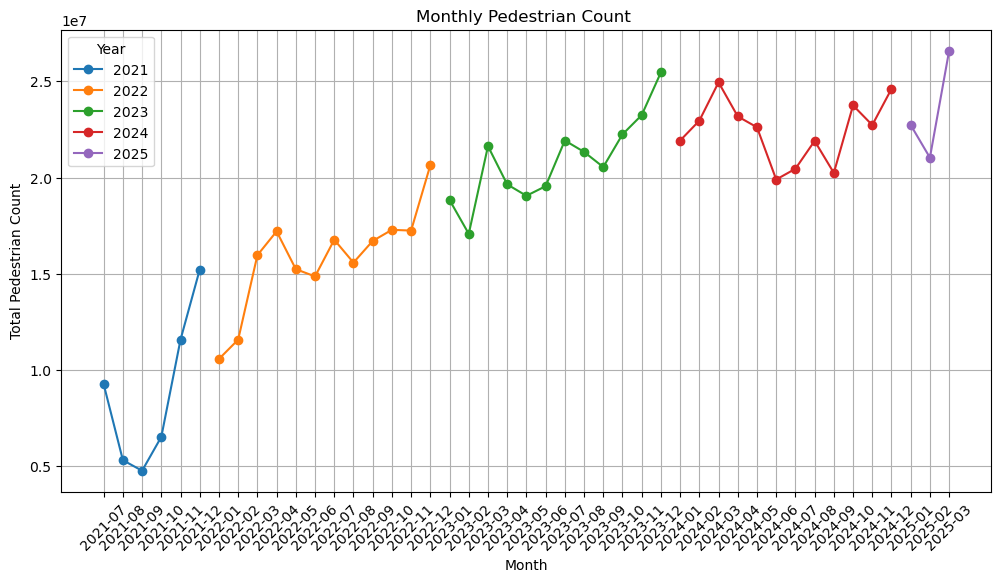

In [75]:

# Copy data
mom_df = pedestrian_df.copy()

# Make the 'sensing_date' column is in datetime format
mom_df["sensing_date"] = pd.to_datetime(mom_df["sensing_date"])

# Extract year and month
mom_df["year_month"] = mom_df["sensing_date"].dt.to_period("M")
mom_df["year"] = mom_df["sensing_date"].dt.year

# Exclude the current month
current_year_month = datetime.datetime.today().strftime("%Y-%m")
mom_df = mom_df[mom_df["year_month"].astype(str) != current_year_month]

# Sum counts per month
monthly_counts = mom_df.groupby(["year_month", "year"])["pedestriancount"].sum().reset_index()

# Convert period to string format for plotting
monthly_counts["year_month"] = monthly_counts["year_month"].astype(str)

# Plot
plt.figure(figsize=(12, 6))

# Separate lines for each year
for year in monthly_counts["year"].unique():
    year_data = monthly_counts[monthly_counts["year"] == year]
    plt.plot(year_data["year_month"], year_data["pedestriancount"], marker='o', linestyle='-', label=str(year))

plt.xlabel("Month")
plt.ylabel("Total Pedestrian Count")
plt.title("Monthly Pedestrian Count ")
plt.xticks(rotation=45)
plt.legend(title="Year")
plt.grid(True)
plt.show()


According to above plot 

* The pedestrian count generally increases year over year.This suggests growing foot traffic in urban areas, possibly due to economic recovery, better    infrastructure, or population growth.

* Each year shows periodic rises and falls in pedestrian counts. Possible factors affecting trends:

   - Weather: Cold months may have lower pedestrian activity.

   - Events & Holidays: Some peaks may correspond to major city events.

   - Work & School Cycles: Summer vacations and holiday periods might show variations.

* Post-Pandemic Recovery (2021 - 2022). 2021 starts with a low count, likely due to lingering COVID-19 restrictions.2022 shows rapid growth, indicating a return to normal foot traffic levels.

* Recent Trends (2024 - 2025). Slight fluctuations in 2024, but pedestrian counts remain relatively high. Early 2025 shows a peak, possibly indicating    an ongoing upward trend.

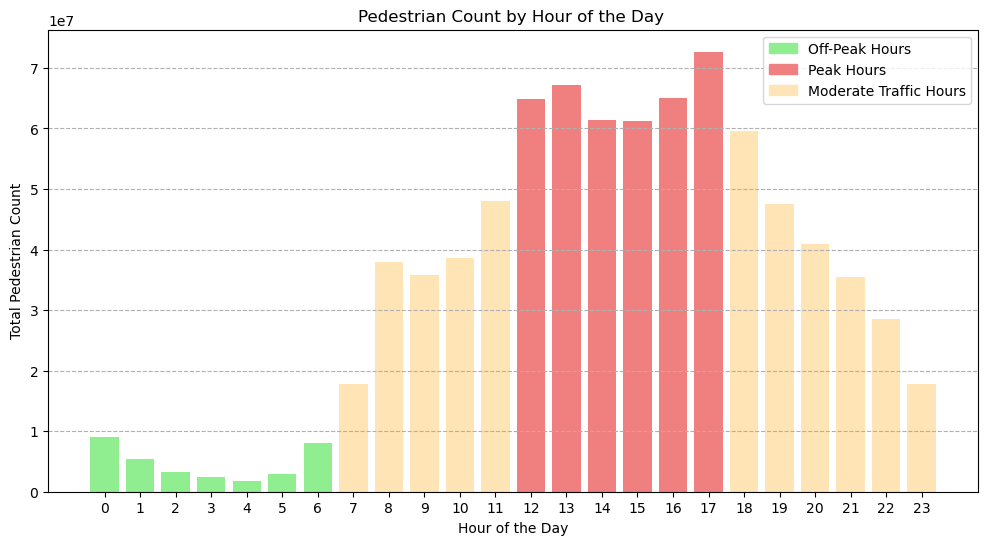

In [59]:
# Aggregate pedestrian count by hour of the day
hourly_counts = pedestrian_df.groupby("hourday")["pedestriancount"].sum().reset_index()

# Identify peak hours and off peak hours
top_hours = hourly_counts.nlargest(6, "pedestriancount")["hourday"]
lowest_hours = hourly_counts.nsmallest(7, "pedestriancount")["hourday"]

# Define colors
colors = ["lightgreen" if hour in lowest_hours.values else
          "lightcoral" if hour in top_hours.values else "moccasin"
          for hour in hourly_counts["hourday"]]

# Plot the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(hourly_counts["hourday"], hourly_counts["pedestriancount"], color=colors)

# Labels and title
plt.xlabel("Hour of the Day")
plt.ylabel("Total Pedestrian Count")
plt.title("Pedestrian Count by Hour of the Day ")
plt.xticks(range(0, 24))  
plt.grid(axis='y', linestyle='--')

# Create legend
legend_labels = [
    Patch(color="lightgreen", label="Off-Peak Hours"),
    Patch(color="lightcoral", label="Peak Hours"),
    Patch(color="moccasin", label="Moderate Traffic Hours")
]

plt.legend(handles=legend_labels, loc='upper right')

# Show plot
plt.show()



According to above bar chart 

* Peak Hours (Red Bars) occurs mostly in the afternoon to early evening around 12 PM to 5 PM. This suggests that pedestrian footfall is highest around lunchtime and evening rush hours.

* Off-Peak Hours (Green Bars) are seen during the late-night and early morning hours between 12 AM to 6 AM, where pedestrian activity is at its lowest.

* Moderate Traffic Hours (Light Orange Bars) show an increasing trend in the morning and then a gradual decline in the evening after peak hours.